# Load dependencies

In [1]:
%cd CVPR
from ComputerVision.Values_Transformations.filter_kernel import sobel_operators, laplacian_kernel, gaussian_kernel
from ComputerVision.Values_Transformations.filter_kernel import sobel_operators_l, gaussian_kernel_l
from ComputerVision.Values_Transformations.filter import Filter
import matplotlib.pyplot as plt
import numpy as np
import cv2
%cd ..

/Users/ipmach/Documents/cvpr/CVPR
/Users/ipmach/Documents/cvpr


# Load image

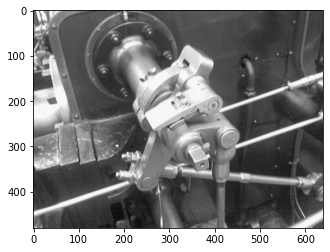

In [2]:
img = cv2.imread("img/engine.pgm", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

# Filter Transformations

## Gaussian kernel

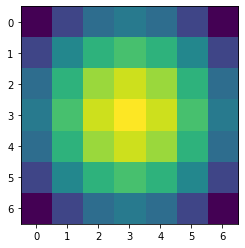

In [3]:
A = gaussian_kernel(7, 3.5)
plt.imshow(A)

### Correlation

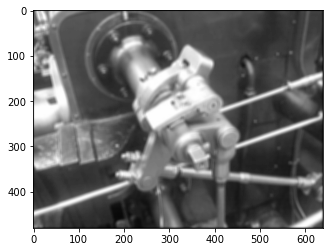

In [4]:
img2 = Filter.apply_filter(img, A, method='correlation')

plt.imshow(img2, cmap='gray')

### Convolution

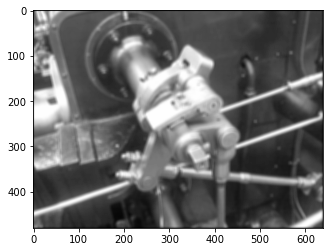

In [5]:
img3 = Filter.apply_filter(img, A, method='convolution')

plt.imshow(img3, cmap='gray')

### Linear separation

In [6]:
a,b = gaussian_kernel_l(7, 3.5)
a, b

(array([0.1153536 , 0.14146946, 0.15989748, 0.16655893, 0.15989748,
        0.14146946, 0.1153536 ]),
 array([0.1153536 , 0.14146946, 0.15989748, 0.16655893, 0.15989748,
        0.14146946, 0.1153536 ]))

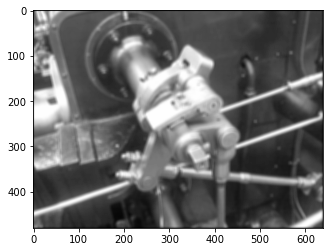

In [7]:
img4 = Filter.apply_filter_l(img, a, b)

plt.imshow(img4, cmap='gray')

### Comparison

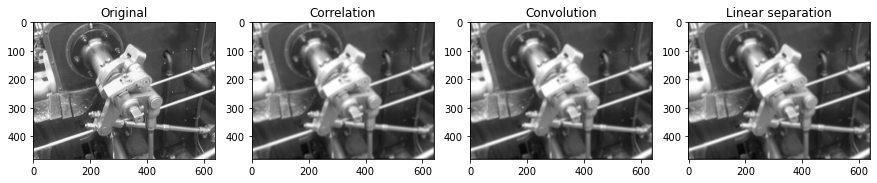

In [8]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.subplot(1, 4, 2)
plt.title("Correlation")
plt.imshow(img2, cmap='gray')
plt.subplot(1, 4, 3)
plt.title("Convolution")
plt.imshow(img3, cmap='gray')
plt.subplot(1, 4, 4)
plt.title("Linear separation")
plt.imshow(img4, cmap='gray')

## Laplacian Kernel

### Second order derivate method

In [9]:
A = laplacian_kernel()
A

array([[ 0,  1,  0],
       [ 1, -4,  1],
       [ 0,  1,  0]])

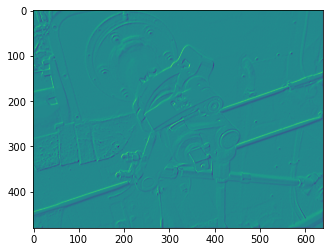

In [10]:
img2 = Filter.apply_filter(img, A)
plt.imshow(img2)

### Alternative method

In [11]:
A = laplacian_kernel(alternative=True)
A

array([[ 1,  1,  1],
       [ 1, -8,  1],
       [ 1,  1,  1]])

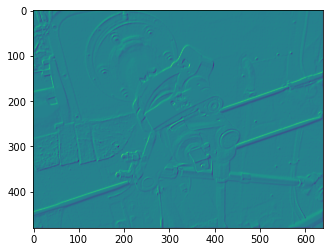

In [12]:
img3 = Filter.apply_filter(img, A)
plt.imshow(img3)

### Comparison

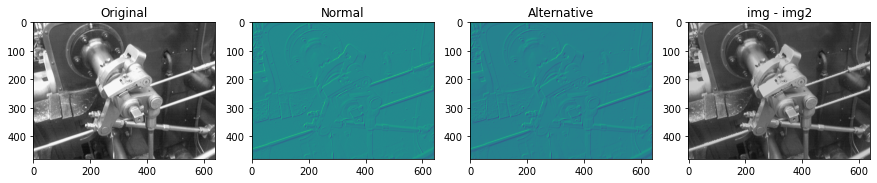

In [13]:
f = np.vectorize(lambda x: x if x > 200 else 0)

plt.figure(figsize=(15, 8))
plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.subplot(1, 4, 2)
plt.title("Normal")
plt.imshow(img2)
plt.subplot(1, 4, 3)
plt.title("Alternative")
plt.imshow(img3)
plt.subplot(1, 4, 4)
plt.title("img - img2")
plt.imshow(abs(img - f(img2)), cmap='gray')

## Sobel method

### Normal approach

In [14]:
gx, gy = sobel_operators()
gx, gy

(array([[-1, -2, -1],
        [ 0,  0,  0],
        [ 1,  2,  1]]),
 array([[-1,  0,  1],
        [-2,  0,  2],
        [-1,  0,  1]]))

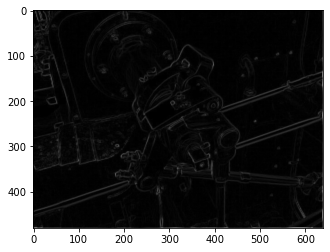

In [15]:
img2 = Filter.apply_operators(img, gx, gy)

plt.imshow(img2, cmap='gray')

### Linear separation

In [16]:
gx_r, gx_c, gy_r, gy_c = sobel_operators_l()
gx_r, gx_c, gy_r, gy_c

(array([1, 2, 1]), array([-1,  0,  1]), array([-1,  0,  1]), array([1, 2, 1]))

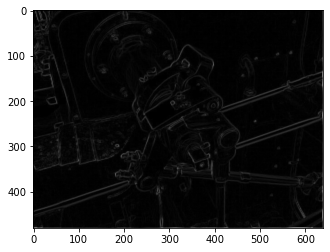

In [17]:
img3 = Filter.apply_operators_l(img, gx_r, gx_c, gy_r, gy_c)

plt.imshow(img3, cmap='gray')

### Comparison

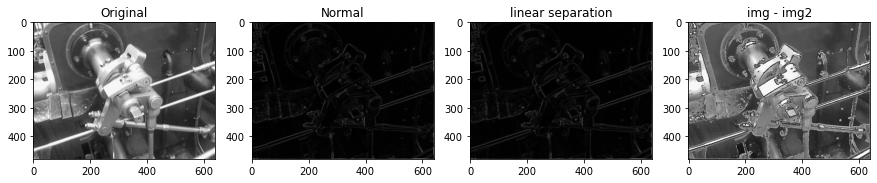

In [18]:
f = np.vectorize(lambda x: 255 if x > 40 else 0)

plt.figure(figsize=(15, 8))
plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.subplot(1, 4, 2)
plt.title("Normal")
plt.imshow(img2, cmap='gray')
plt.subplot(1, 4, 3)
plt.title("linear separation")
plt.imshow(img3, cmap='gray')
plt.subplot(1, 4, 4)
plt.title("img - img2")
plt.imshow(abs(img - f(img2)), cmap='gray')